In [3]:
# Load tabular data
root = "./experiment_data/"
data_path = root +  "DataSets/HardTablesR1/Valid/tables/004RX1PJ.csv"
data_truth_cea = root + "DataSets/HardTablesR1/Valid/gt/cea_gt.csv"
data_truth_cpa = root + "DataSets/HardTablesR1/Valid/gt/cpa_gt.csv"
data_truth_cta = root + "DataSets/HardTablesR1/Valid/gt/cta_gt.csv"

import pandas as pd


data = pd.read_csv(data_path)
# data.head()
# list(data.columns)
data['col1'].describe().to_dict()


{'count': 3.0,
 'mean': 1.0005,
 'std': 1.7316178088423553,
 'min': 0.00053,
 '25%': 0.00075,
 '50%': 0.00097,
 '75%': 1.500485,
 'max': 3.0}

In [4]:
# tabular data to networkx graph
# ==============
# column node: with UID and columnName=True
# cell node: with name and isCell=True and isSubject=True/False
# ==============

import networkx as nx
import uuid

G = nx.DiGraph()

cols_save = []
node_ids = []
for column in list(data.columns):

    if(data[column].dtype == 'O'):
        node_id = "###"+uuid.uuid4().hex
        G.add_node(node_id,isColumnName=True,isSubject=True)
        node_ids.append(node_id)
        cols = data[column].to_list()
        cols_save = cols
        for col0 in cols:
            for col1 in cols:
                if col0 == col1:
                    continue
                G.add_edge(col1,col0)
                G.add_edge(col0,col1)
            G.add_node(col0,isCell=True,isSubject=True)
            G.add_edge(node_id,col0,subclass=True,superclass=False)
            G.add_edge(col0,node_id,subclass=False,superclass=True)
    else:
        node_id = "###"+uuid.uuid4().hex
        G.add_node(node_id,isColumnName=True, isNumericColumn=True, numericProperty=data[column].describe().to_dict())
        node_ids.append(node_id)
        for key, value in data[column].describe().to_dict().items():
            G.nodes[node_id][key] = value

        # Add column relationship edge
        print(node_ids)
        for node in node_ids:
            if node == node_id:
                continue
            G.add_edge(node_id,node)
            G.add_edge(node,node_id)
G.nodes()

['###e9e3333ad03f4fecbc453ae4fad9e98b', '###3314a36c52d94fcfb7cb18f833d1c0f0']


NodeView(('###e9e3333ad03f4fecbc453ae4fad9e98b', 'CY Ursae Majoris', 'IY Ursae Majoris', 'SW Ursae Majoris', '###3314a36c52d94fcfb7cb18f833d1c0f0'))

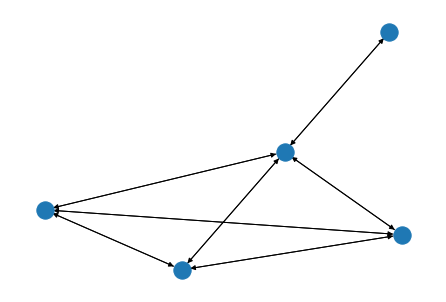

In [5]:
# Draw graph
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

In [6]:
# Curl data
import requests
def get_Q_json_by_request(search_term):
    search_term = search_term.replace(" ","+")
    url = "https://www.wikidata.org/w/api.php?action=wbsearchentities&search=@@@&format=json&language=en&uselang=en&type=item"
    url = url.replace('@@@',search_term)
    r = requests.get(url)
    return r.json()

In [8]:
import re
def extract_Q_value(url):
  Q_value = re.search('(\/)(Q\d+)',url)
  return Q_value[2]



def find_relevant_Q_value(title):
  res = get_Q_json_by_request(title)
  print(f"Q_value Result by finding title:{title}\n, result:{res}")
  bindings = res['search']
  Q_values = []
  for index, binding in enumerate(bindings):
    Q_values.append(binding['id'])
  return Q_values

# # Test
# find_relevant_Q_value("IY Ursae Majoris")


In [11]:
import wptools
import re

def extract_wiki_Q_value(sentence):
  Q_value = re.search('(.+)(\()(Q\d+)(\))',sentence)
  return Q_value[1],Q_value[3]

def extract_wiki_P_value(sentence):
  P_value = re.search('(.+)(\()(P\d+)(\))',sentence)
  return P_value[1], P_value[3]

def wikidata2Graph(wiki_data: dict):
    G = nx.DiGraph()
    for key in wiki_data.keys():
        describe, p_value = extract_wiki_P_value(key)
        wiki_data[key]


# Find page
candidate_graphs = []
for col in cols_save:
    print(f"start searching:{col}")
    Q_values = find_relevant_Q_value(col)
    print(f"Q_values:{Q_values}")
    for Q_value in Q_values:
        print(f"start searching Q_value:{Q_value}")
        page = wptools.page(wikibase=Q_value,silent=True)
        page.get_wikidata()
        # page.data.kyes() = dict_keys(['requests', 'labels', 'wikidata', 'wikidata_pageid', 'modified', 'wikibase', 'wikidata_url', 'description', 'label', 'claims', 'title', 'what'])
        wiki_data = page.data['wikidata']
         
        # Create graph from wikidata info
        
        # Using model to match the subGraph here!!!!
        break


start searching:IY Ursae Majoris
Q_value Result by finding title:IY Ursae Majoris
, result:{'searchinfo': {'search': 'IY Ursae Majoris'}, 'search': [{'id': 'Q98523828', 'title': 'Q98523828', 'pageid': 96730000, 'display': {'label': {'value': 'IY Ursae Majoris', 'language': 'en'}}, 'repository': 'wikidata', 'url': '//www.wikidata.org/wiki/Q98523828', 'concepturi': 'http://www.wikidata.org/entity/Q98523828', 'label': 'IY Ursae Majoris', 'match': {'type': 'label', 'language': 'en', 'text': 'IY Ursae Majoris'}}, {'id': 'Q68173190', 'title': 'Q68173190', 'pageid': 67846262, 'display': {'label': {'value': 'IY Ursae Majoris', 'language': 'en'}, 'description': {'value': 'scholarly article', 'language': 'en'}}, 'repository': 'wikidata', 'url': '//www.wikidata.org/wiki/Q68173190', 'concepturi': 'http://www.wikidata.org/entity/Q68173190', 'label': 'IY Ursae Majoris', 'description': 'scholarly article', 'match': {'type': 'label', 'language': 'en', 'text': 'IY Ursae Majoris'}}], 'success': 1}
Q_val